# Import données et librairies
---



In [147]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from textblob import TextBlob
from wordcloud import WordCloud
sns.set(rc={'figure.figsize':(12,7)})

In [149]:
df_erp_original = pd.read_excel('/content/gdrive/MyDrive/Datasets/Wine_simplon/erp.xlsx')
df_liaison_original = pd.read_excel('/content/gdrive/MyDrive/Datasets/Wine_simplon/liaison.xlsx')
df_web_original = pd.read_excel('/content/gdrive/MyDrive/Datasets/Wine_simplon/web.xlsx')
df_erp, df_liaison, df_web = df_erp_original, df_liaison_original, df_web_original

## Preprocessing

In [150]:
df_web = df_web.drop_duplicates(subset=['sku'])
df_temp = pd.merge(df_erp,
                        df_liaison,left_on='product_id', right_on='product_id', how="inner")
df_full =  pd.merge(df_temp,
                        df_web, left_on='id_web', right_on='sku', how="inner")
df_full.sort_values('price', ascending = False, inplace = True)

here we just take a look on our dataset

In [151]:
print(df_full.head())
print(df_full.shape)
df_full.drop_duplicates()
print(df_full.info())
print(df_full.describe())
print(df_full.shape)
df_full

     product_id  onsale_web  price  ...  post_type post_mime_type comment_count
290        4352           1  225.0  ...    product            NaN           0.0
517        5001           1  217.5  ...    product            NaN           0.0
678        5892           1  191.3  ...    product            NaN           0.0
309        4402           1  176.0  ...    product            NaN           0.0
644        5767           1  175.0  ...    product            NaN           0.0

[5 rows x 34 columns]
(805, 34)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 290 to 736
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             805 non-null    int64         
 1   onsale_web             805 non-null    int64         
 2   price                  805 non-null    float64       
 3   stock_quantity         805 non-null    int64         
 4   stock_status         

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
290,4352,1,225.0,0,outofstock,15940,15940,0,0,0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,NaN,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
517,5001,1,217.5,20,instock,14581,14581,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-17 09:45:39,2018-07-17 07:45:39,NaN,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,publish,closed,closed,NaN,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
678,5892,1,191.3,10,instock,14983,14983,0,0,0,0.0,3.0,taxable,NaN,2.0,2019-03-28 10:21:36,2019-03-28 09:21:36,NaN,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,publish,closed,closed,NaN,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
309,4402,1,176.0,8,instock,3510,3510,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,NaN,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,publish,closed,closed,NaN,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
644,5767,1,175.0,12,instock,15185,15185,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-13 14:43:22,2019-03-13 13:43:22,NaN,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,publish,closed,closed,NaN,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,4173,1,5.7,100,instock,16211,16211,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-02-14 17:10:39,2018-02-14 16:10:39,NaN,Maurel Pays d'Oc Chenin-Colombard 2019,Ce vin d'une grande fraîcheur est élaboré à pa...,publish,closed,closed,NaN,maurel-pays-doc-chenin-colombard-2019,2020-08-07 17:35:03,2020-08-07 15:35:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
188,4172,1,5.7,167,instock,16210,16210,0,0,0,0.0,43.0,taxable,NaN,2.0,2018-02-14 16:54:33,2018-02-14 15:54:33,NaN,Maurel Pays d'Oc Chardonnay 2019,Un très joli petit chardonnay qui nous révèle ...,publish,closed,closed,NaN,maurel-pays-oc-chardonnay-2019,2020-08-27 15:35:02,2020-08-27 13:35:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
190,4174,1,5.7,94,instock,16209,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,NaN,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,NaN,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
651,5777,1,5.7,132,instock,14338,14338,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-15 10:13:30,2019-03-15 09:13:30,NaN,Maurel Pays d'Oc Cabernet-Sauvignon 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,NaN,maurel-pays-d-oc-cabernet-sauvignon-2017,2020-03-11 09:30:06,2020-03-11 08:30:06,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,

# Year Processing

does not work yet 

In [152]:
df_full["year"] = df_full["post_title"].str[-4:]

In [153]:
for i in range (df_full['year'].shape[0]):
  print(df_full['year'][i])

2018
2017
2018
2018
2017
2018
2018
2017
2017
2018
2017
2018
2018
2018
2019
2018
2019
2012
2018
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2018
2019
2019
2019
2017
2018
2017
2017
2016
2016
2017
2019
2012
2018
2015
2015
2015
 201
2015
2016
2016
2015
2013
2016
2019
2017
2017
2019
2019
2017
2018
2015
2018
2016
2018
2016
2016
2017
2016
2018
2019
2018
2016
2017
2017
2017
2012
2015
2017
2013
erve
2006
Rosé
erve
2012
Rosé
2009
2010
2016
2016
2015
2017
2016
2016
2017
2018
2017
2017
2017
2016
2018
2015
2017
2017
2017
2018
2018
2017
2019
2019
2017
2018
2018
2019
2018
2018
2019
2017
2016
2018
2019
2019
2019
2019
2017
2019
2017
2015
2019
2019
2019
2018
2019
2018
2017
2016
2018
2019
2

In [154]:
#for i in range (df_full['year'].shape[0]):
  #if (len(df_full['year'][i])!= 4) 
df_full_bis = df_full
#df_full_bis = df_full_bis.drop(df_full_bis[type(df_full_bis.year)!=str ].index)
df_full_bis = df_full_bis.drop(df_full_bis[len(df_full_bis.year)!=4 ].index)


KeyError: ignored

In [ ]:
rows_to_drop = []
for i in range (df_full['year'].shape[0]):
  if (len(df_full['year'][i])!= 4):
    rows_to_drop.append(i)


In [ ]:
rows_to_drop

In [ ]:
df_full['year'] = df_full['year'].to_string()

In [ ]:
df_full['year'] = pd.to_datetime(df_full['year'])

In [ ]:
# no_na_year_stuff =  df_pca.drop(df_pca[df_pca.year == 'nan' ].index)
#print(no_na_year_stuff.shape)
#no_na_year_stuff['year'] = no_na_year_stuff['year'].astype(int)
#print(no_na_year_stuff.shape)

In [ ]:
for i in df_full["year"]:
  print (type(i))
print(df_full["year"][25])
import re
lalala = df_full["year"].*([1-3][0-9]{3})

# get turnover

In [155]:
df_full['sales_amount'] = df_full['price']*df_full['total_sales']
turnover = df_full['sales_amount'].sum()
print('the turnover is : ', turnover)

the turnover is :  70568.6


In [156]:
df_full.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'id_web', 'sku', 'virtual', 'downloadable', 'rating_count',
       'average_rating', 'total_sales', 'tax_status', 'tax_class',
       'post_author', 'post_date', 'post_date_gmt', 'post_content',
       'post_title', 'post_excerpt', 'post_status', 'comment_status',
       'ping_status', 'post_password', 'post_name', 'post_modified',
       'post_modified_gmt', 'post_content_filtered', 'post_parent', 'guid',
       'menu_order', 'post_type', 'post_mime_type', 'comment_count', 'year',
       'sales_amount'],
      dtype='object')

In [157]:
df_fix_outliers = df_full[['price','total_sales']]

# Outliers Graphical Approach

We do see some speciales values for the price repartition (price > 100  euros and prices around 5 euros)
they might be considered as outliers
but here it's about wine price and lower prices around 5 euros is usual
same, prices between 100 and 1000 euros is also usual for some special bottles
So there is no true outliers but for some kind of processing we could have to exclude thoses marginal values




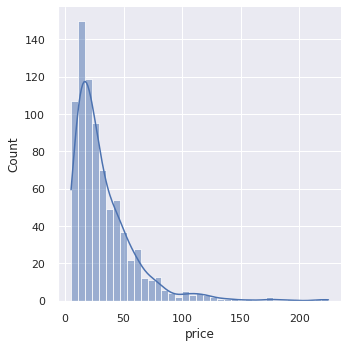

In [158]:
sns.displot(df_fix_outliers, x='price',kde=True)

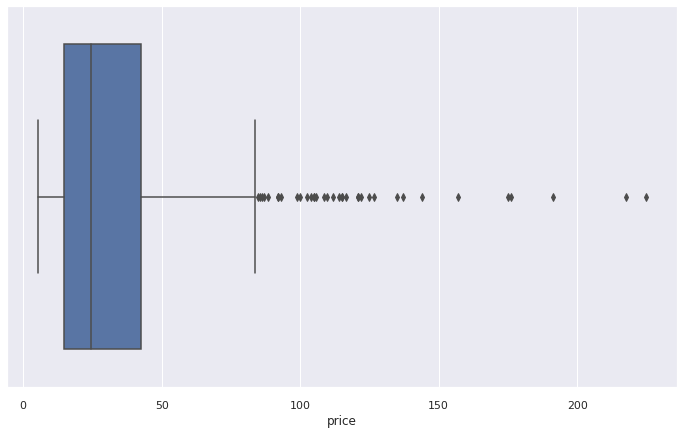

In [159]:
sns.boxplot(x=df_full['price'])

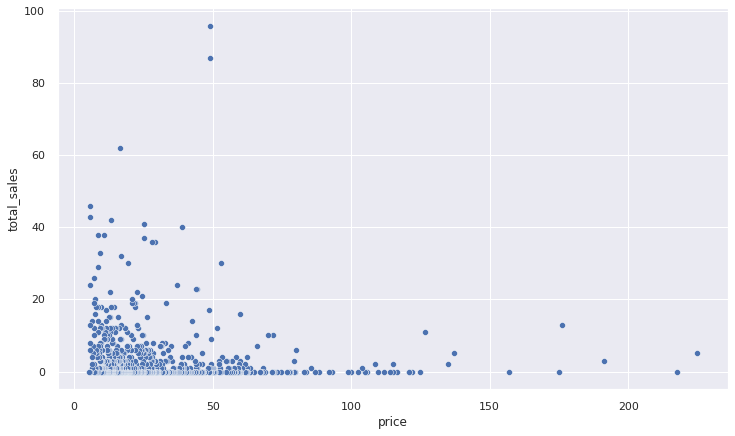

In [160]:
 sns.scatterplot(data=df_fix_outliers, x='price', y='total_sales')

# Outliers Statistic approach

## Interquartile Range to Detect Outliers

In [161]:
# Compute Quartiles :
Q1 = np.percentile(df_full['price'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df_full['price'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df_full['price'], 75, interpolation = 'midpoint')
# Interquaritle range (IQR)
IQR = Q3 - Q1
print('we got \n Q1 = {}\n Q2 = {} \n Q3 = {}\n IQR = {}'.format(Q1,Q2,Q3,IQR))

we got 
 Q1 = 14.6
 Q2 = 24.4 
 Q3 = 42.5
 IQR = 27.9


In [162]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim.round(2))
print('up_limit is', up_lim)

low_limit is -27.25
up_limit is 84.35


here only up limit is gonna be used : price is positive value and price repartition on lower bound is not so far of the Q2 value

In [163]:
df_iqr = df_full.drop(df_full[df_full.price > 84.35 ].index)
print(df_full.shape)
print(df_iqr.shape)
print ("le nombre d'outliers avec l'Interquartile est :" ,df_full.shape[0] - df_iqr.shape[0])

(805, 36)
(769, 36)
le nombre d'outliers avec l'Interquartile est : 36


## Z-score to detect outliers

We choose to keep only the values into a two standard deviation interval on eatch side of the mean

In [164]:
df_full['zscore'] = ( df_full['price'] - df_full['price'].mean() ) / df_full['price'].std()
df_zscore = df_full[(-2<df_full['zscore']) & (df_full['zscore'] <2)]
print(df_full.shape)
print(df_zscore.shape)
print ("le nombre d'outliers avec le Z-score est :" ,df_full.shape[0] - df_zscore.shape[0])

(805, 37)
(772, 37)
le nombre d'outliers avec le Z-score est : 33


## Exporting Curated Datas

In [165]:
df_zscore
df_iqr
from google.colab import files
df_zscore.to_csv('df_zscore.csv') 
files.download('df_zscore.csv')
df_iqr.to_csv('df_iqr.csv') 
files.download('df_iqr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualizing Outliers

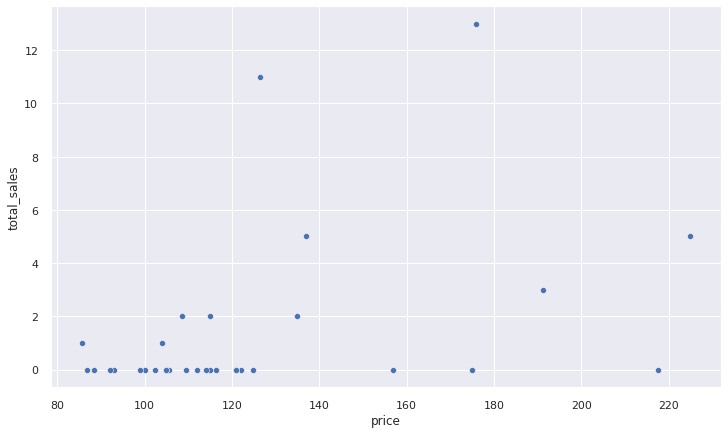

In [166]:
df_plot_outliers = df_full.drop(df_full[df_full.price < 84.35 ].index)
sns.scatterplot(data=df_plot_outliers, x='price', y='total_sales')

# Making dataframes for IA

In [167]:
df_pca = df_full[['price','total_sales','stock_quantity']]
df_pca = df_full[['price','total_sales','stock_quantity']]
df_pca = df_pca.dropna()
print(df_pca.shape)

(714, 3)


In [168]:
df_iqr_ia = df_iqr[['price','total_sales','stock_quantity']]
df_iqr_ia = df_iqr_ia.dropna()
print(df_iqr_ia.shape)

(682, 3)


In [169]:
df_zscore_ia = df_zscore[['price','total_sales','stock_quantity']]
df_zscore_ia = df_zscore_ia.dropna()
print(df_zscore_ia.shape)

(683, 3)


## stuff for ACP

In [170]:
# Plotting function for ACP
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

# my ACP 3 components

Acp is Working
Don't worry the error message is normal 

In [171]:
print(df_pca.shape)
df_pca = df_pca.dropna()
print(df_pca.shape)

(714, 3)
(714, 3)


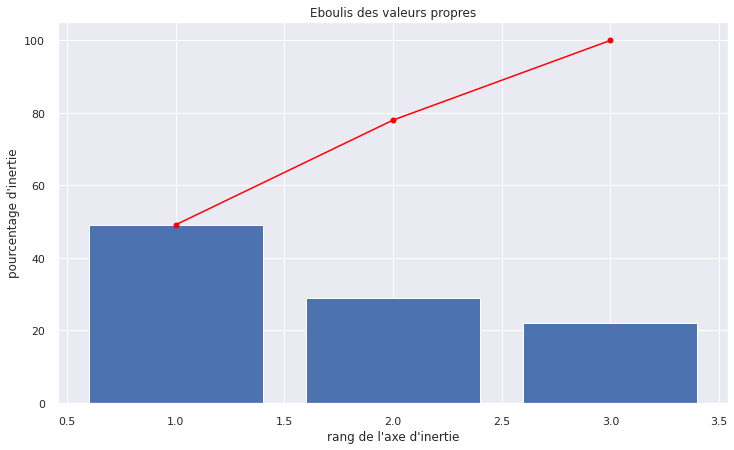

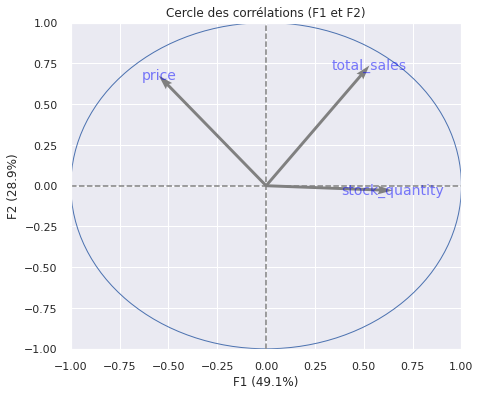

IndexError: ignored

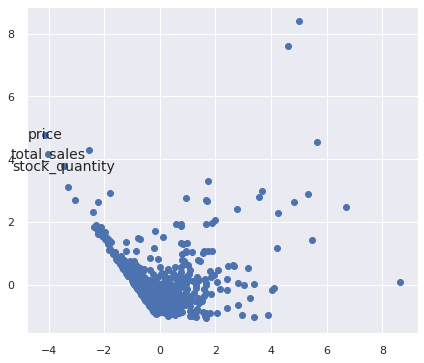

In [172]:
# choix du nombre de composantes à calculer
n_comp = 3

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_pca

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X1 = df_pca.values
names = ['price', 'total_sales', 'stock_quantity']# ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled = std_scale.transform(X1)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

In [ ]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
print( "Les vecteurs propres de l'ACP sont :\n",eigenvectors )
#kmeans.cluster_centers_

# Acp 2 components

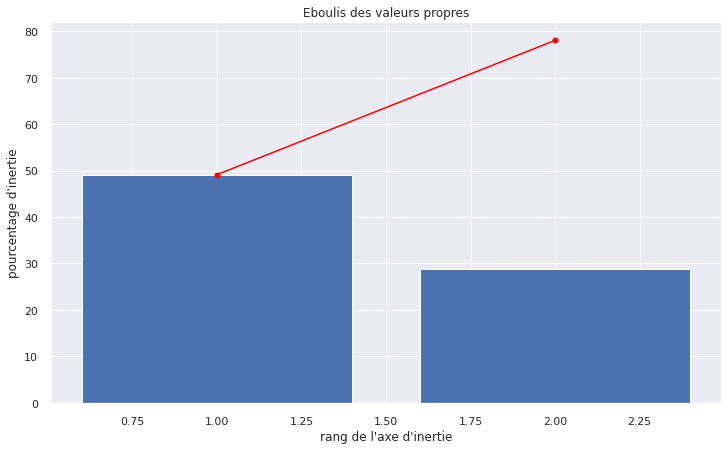

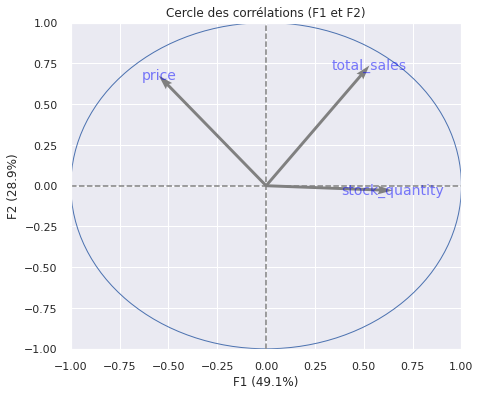

IndexError: ignored

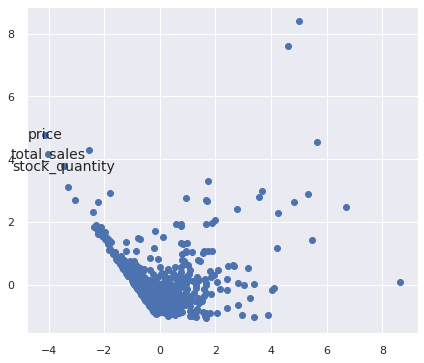

In [173]:
# choix du nombre de composantes à calculer
n_comp = 2

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_pca

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X1 = df_pca.values
names = ['price', 'total_sales', 'stock_quantity']# ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled = std_scale.transform(X1)

# Calcul des composantes principales
pca2 = decomposition.PCA(n_components=n_comp)
pca2.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca2)

# Cercle des corrélations
pcs = pca2.components_
display_circles(pcs, n_comp, pca2, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca2.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca2, [(0,1),(2,3),(4,5)], labels = np.array(names))
plt.show()

In [ ]:
eigenvalues = pca2.explained_variance_
eigenvectors = pca2.components_
print( "Les vecteurs propres de l'ACP sont :\n",eigenvectors )

# Kmeans

In [174]:
# Feed with all the dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X = df_pca
kmeans_full = KMeans(n_clusters=5, random_state=0).fit(X)
#'price','total_sales','stock_quantity'
print('Les Coordonées des centroides sont :')
kmeans_full.cluster_centers_

Les Coordonées des centroides sont :


array([[ 31.98107417,   3.36828645,   6.68542199],
       [ 11.55272727,  11.34545455, 124.27272727],
       [ 11.1       ,  13.125     , 318.875     ],
       [ 98.53939394,   1.24242424,   8.16666667],
       [ 17.87474227,   3.79896907,  41.16494845]])

In [175]:
# Feed only with 66% of the dataset
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_train)
my_predicts = kmeans.predict(X_test)
kmeans.cluster_centers_

array([[ 17.09233577,   3.39416058,  50.84671533],
       [106.59459459,   1.43243243,   8.89189189],
       [  9.38571429,  13.42857143, 172.39285714],
       [ 31.28083942,   3.24452555,   7.31021898],
       [ 16.4       ,  26.5       , 470.5       ]])

# Silouhet and label stuff

In [176]:
kmeans.labels_.shape
X_test.shape

(236, 3)

In [177]:
cluster_labels = [0,1,2,3,4]
sample_silhouette_values = silhouette_samples(X_train, kmeans.labels_)
sample_silhouette_values

array([ 0.50726467,  0.35709839,  0.16938996,  0.55528407,  0.60862199,
        0.30313123,  0.59788006,  0.60558301,  0.03357298,  0.58954757,
        0.43511199,  0.6494514 ,  0.34333776,  0.61167999,  0.56315766,
        0.14655857,  0.56162055,  0.49423795,  0.62743122,  0.39198844,
        0.58603846,  0.25991359,  0.59253434, -0.01596461,  0.57864118,
        0.65156339,  0.50464044,  0.33852151,  0.56105136,  0.53004319,
        0.59439958,  0.58926842,  0.3199757 ,  0.61302628,  0.06837814,
        0.61549337,  0.40639657,  0.60410658,  0.12433922,  0.54390108,
        0.27790008,  0.61461387,  0.65175969,  0.22548726,  0.53783246,
        0.05179648, -0.01363462,  0.65343704,  0.36091629,  0.56961697,
        0.51859746,  0.56254013,  0.53619818,  0.6540804 ,  0.36821213,
        0.60954785,  0.47819764,  0.27257052,  0.42205449,  0.63647508,
        0.38880144,  0.48356019,  0.3221952 ,  0.59804664,  0.64130928,
        0.56884124,  0.59009746,  0.43467975,  0.51650684,  0.30

In [178]:
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
silhouette_avg

0.4560710020476966

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f400f7ab550>,
                     model=None)

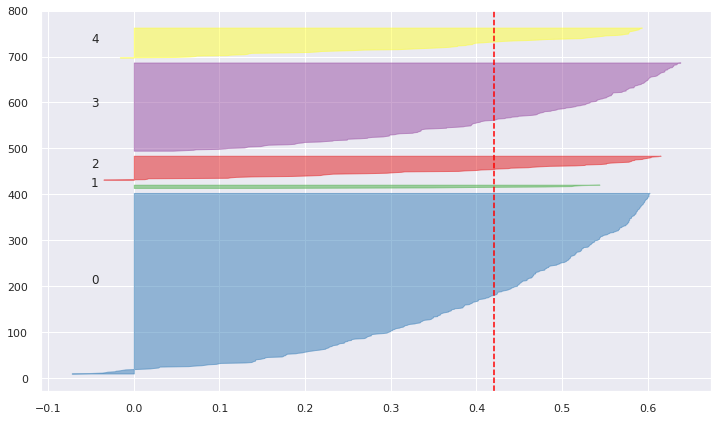

In [179]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)

In [180]:
#score = silhouette_score(X, kmeans.labels_, metric='euclidean')

In [181]:
print(my_predicts)
X_test['labels'] = my_predicts
my_predicts_X = kmeans.predict(X)
X['labels'] = my_predicts_X

[3 2 1 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 2 3 1 3 3 0 3 3 3 3 3 2 3 3 0 3 3 0 3
 3 3 3 3 0 0 3 0 1 3 0 0 3 3 3 3 0 0 0 3 3 3 3 1 0 0 0 3 0 3 0 3 2 0 0 0 3
 3 3 3 0 0 3 3 3 1 3 3 3 3 0 3 1 3 0 3 0 3 1 3 3 3 0 3 0 3 3 0 3 3 3 3 0 3
 3 3 3 3 3 3 1 3 0 3 1 0 3 3 3 3 3 3 3 3 3 3 3 1 3 2 3 3 3 3 1 3 0 1 3 3 3
 1 3 3 3 3 3 3 3 1 3 3 0 0 3 3 3 1 0 0 3 3 3 3 3 1 3 3 3 0 3 3 0 3 3 3 3 3
 0 3 3 3 3 2 3 3 0 0 3 3 0 0 3 3 0 3 0 0 3 1 3 3 3 0 0 3 0 3 1 1 1 3 3 3 3
 3 1 3 3 3 3 2 3 3 0 3 3 0 3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Plotting The clusters for k = 5

In [182]:
X_plot = X
print(my_predicts)
X_test['labels'] = my_predicts
my_predicts_X = kmeans_full.predict(X)
X_plot['labels'] = my_predicts_X

[3 2 1 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 2 3 1 3 3 0 3 3 3 3 3 2 3 3 0 3 3 0 3
 3 3 3 3 0 0 3 0 1 3 0 0 3 3 3 3 0 0 0 3 3 3 3 1 0 0 0 3 0 3 0 3 2 0 0 0 3
 3 3 3 0 0 3 3 3 1 3 3 3 3 0 3 1 3 0 3 0 3 1 3 3 3 0 3 0 3 3 0 3 3 3 3 0 3
 3 3 3 3 3 3 1 3 0 3 1 0 3 3 3 3 3 3 3 3 3 3 3 1 3 2 3 3 3 3 1 3 0 1 3 3 3
 1 3 3 3 3 3 3 3 1 3 3 0 0 3 3 3 1 0 0 3 3 3 3 3 1 3 3 3 0 3 3 0 3 3 3 3 3
 0 3 3 3 3 2 3 3 0 0 3 3 0 0 3 3 0 3 0 0 3 1 3 3 3 0 0 3 0 3 1 1 1 3 3 3 3
 3 1 3 3 3 3 2 3 3 0 3 3 0 3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

clusters characteristics : 

Cluster 0 : Middle price and high sell volume

Cluster 1 : Low prices and low sell volume

Cluster 2 : Low prices and middle sell volume

Cluster 3 : Pretty low - middle prices and low sell 

Cluster 4 : high price and low sell volume

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


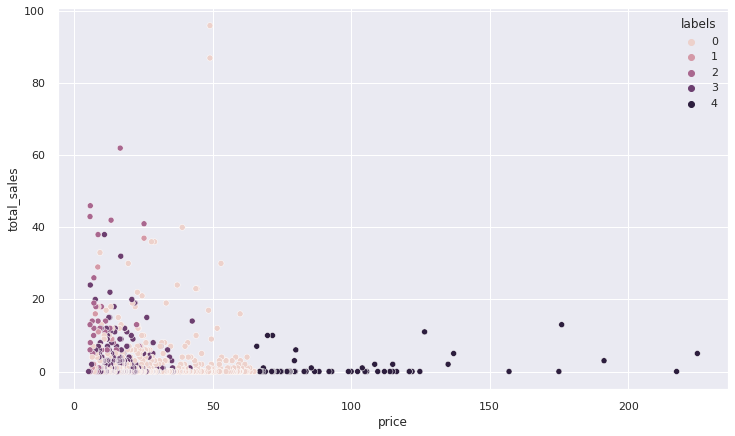

In [183]:
sns.scatterplot(X_plot['price'], X_plot['total_sales'], hue = X_plot['labels'])

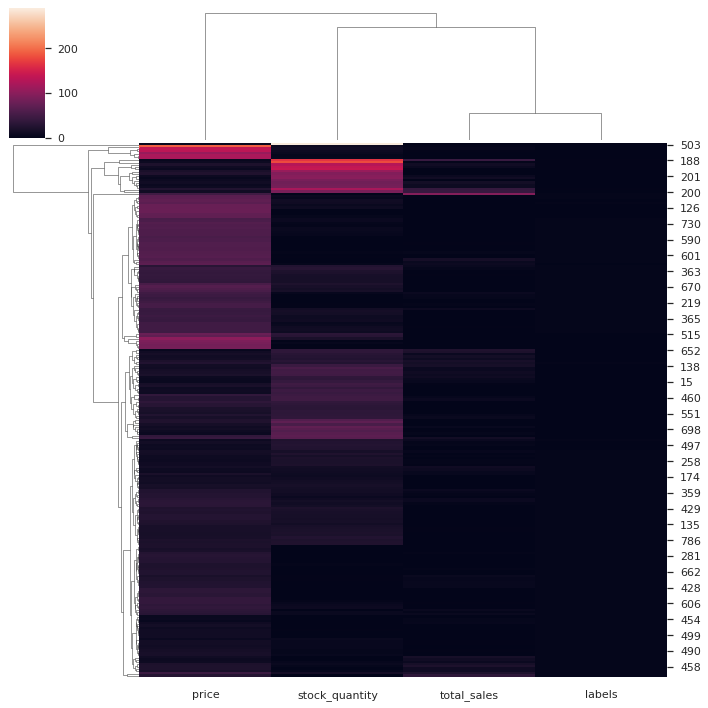

In [184]:
sns.clustermap(X_test)

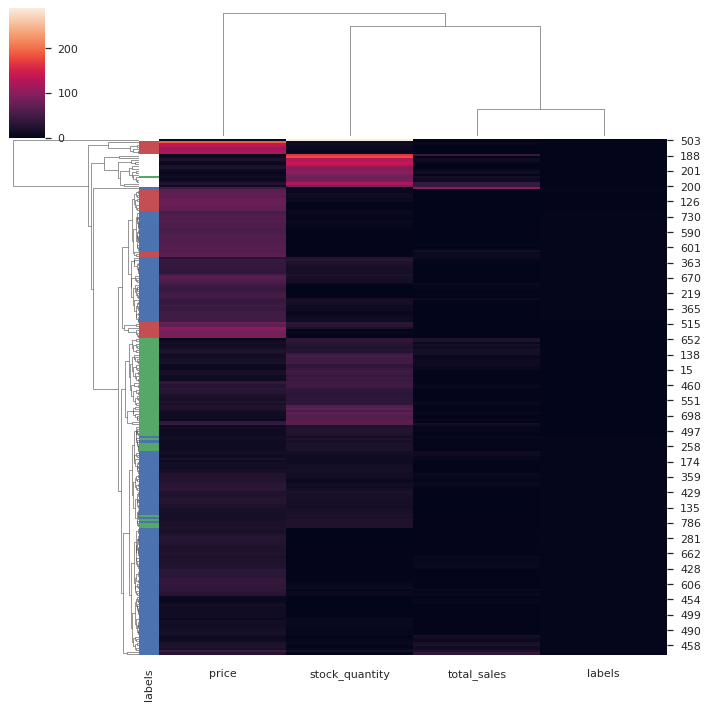

In [185]:
species = X_plot.pop("labels")
lut = dict(zip(species.unique(), "rbg"))
u_labels = np.unique(labels)

row_colors = species.map(lut)
sns.clustermap(X_test, row_colors=row_colors)

In [186]:
labels = my_predicts
my_predicts
#Getting unique labels
 
u_labels = np.unique(labels)
print(u_labels)
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_test[labels == i , 0] , X_test[labels == i , 1] , label = i)
plt.legend()
plt.show()

[0 1 2 3]


TypeError: ignored

In [ ]:
nb_cluster = [i for i in range(10)]

# Elbow Methode

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10) 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

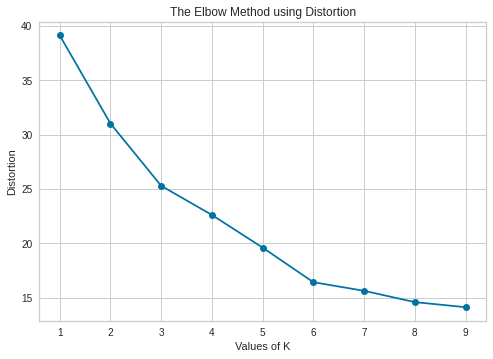

In [ ]:
plt.plot(K, distortions, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# Text Sentiment Analysis

Still Not Working Yet

In [ ]:
 #df_full['post_excerpt'] = df_full['post_excerpt'].astype(str)
 df_full['post_excerpt'] = df_full['post_excerpt'].to_string()

In [ ]:
list_ = []
for i in range(len(df_full)):
  list_.append(type(df_full['post_excerpt'][0]))

list_df = pd.DataFrame(list_, columns=['type'])
list_df.groupby('type')['type'].count()

In [ ]:
 df_full.info()

In [ ]:
df_full['post_excerpt_bis'] = df_full['post_excerpt']
for i in range(df_full['post_excerpt'].shape[0]):
  df_full['post_excerpt_bis'][i] = df_full['post_excerpt'][i].split(' ')

In [ ]:
# mod_string = org_string[:size - 3]
df_full['subjectivity'] = df_full['post_excerpt']
df_full['polarity'] = df_full['post_excerpt']
for i in range(df_full['post_excerpt'].shape[0]):
  df_full['subjectivity'][i] = TextBlob(df_full['post_excerpt'][i]).sentiment.subjectivity
  df_full['polarity'][i] = TextBlob(df_full['post_excerpt'][i]).sentiment.polarity